First 5 lines of the cleaned data:
  YOUR GENDER\n\nMALE \nFEMALE \nOTHER  \
0                              FEMALE    
1                              FEMALE    
2                                MALE    
3                                MALE    
4                              FEMALE    

  YOUR PROFESSION \n\nFARMER \r\nTEACHER \r\nSTUDENT \r\nENGINEER \r\nDOCTOR \r\nBUSINESSMAN\r\nEMPLOYEE \r\nHOUSEWIFE \r\nOTHER  \
0                                           STUDENT                                                                                
1                                           STUDENT                                                                                
2                                           STUDENT                                                                                
3                                           STUDENT                                                                                
4                                           STUDENT 

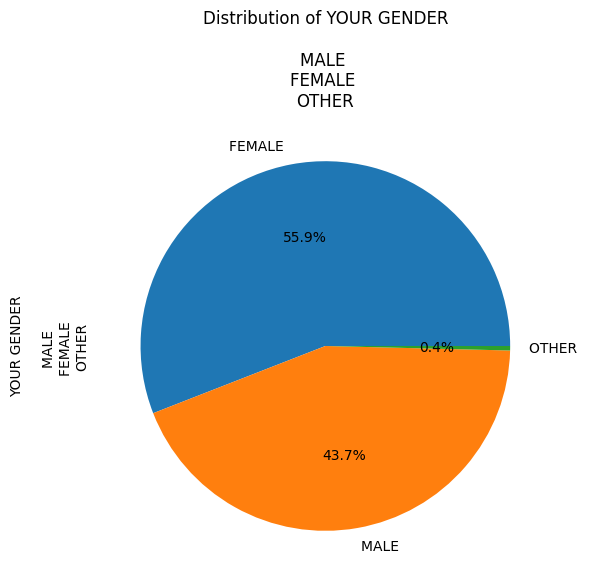

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


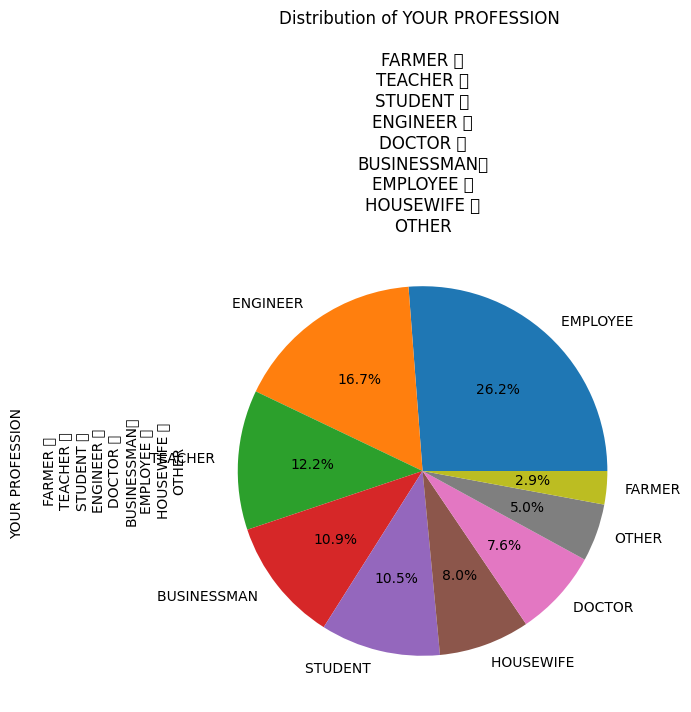

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


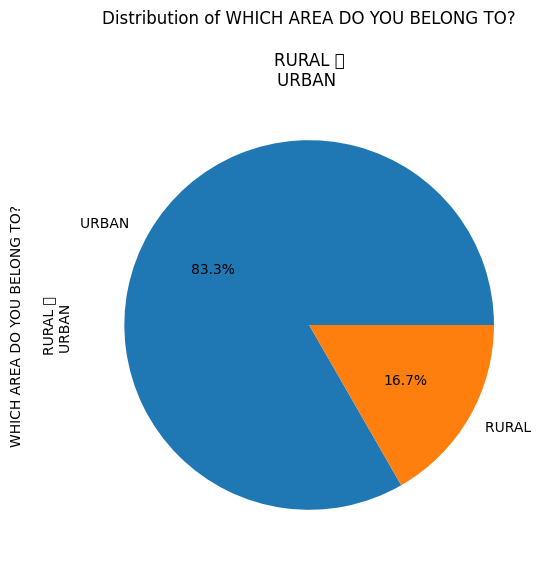

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


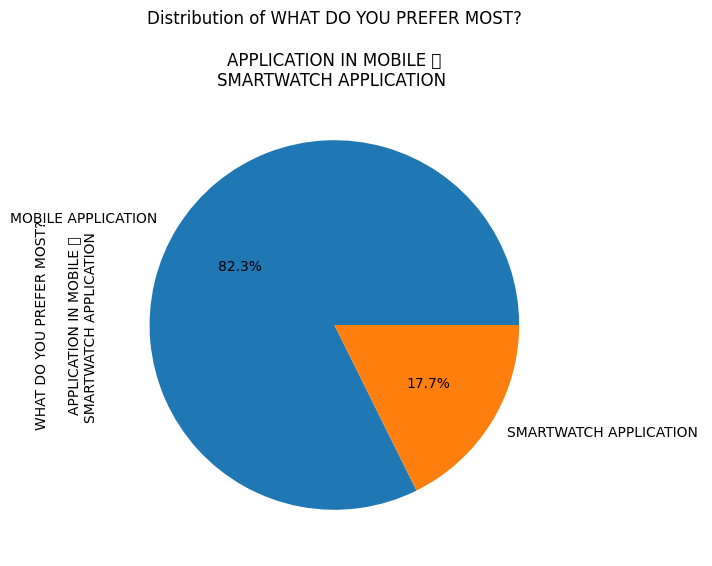

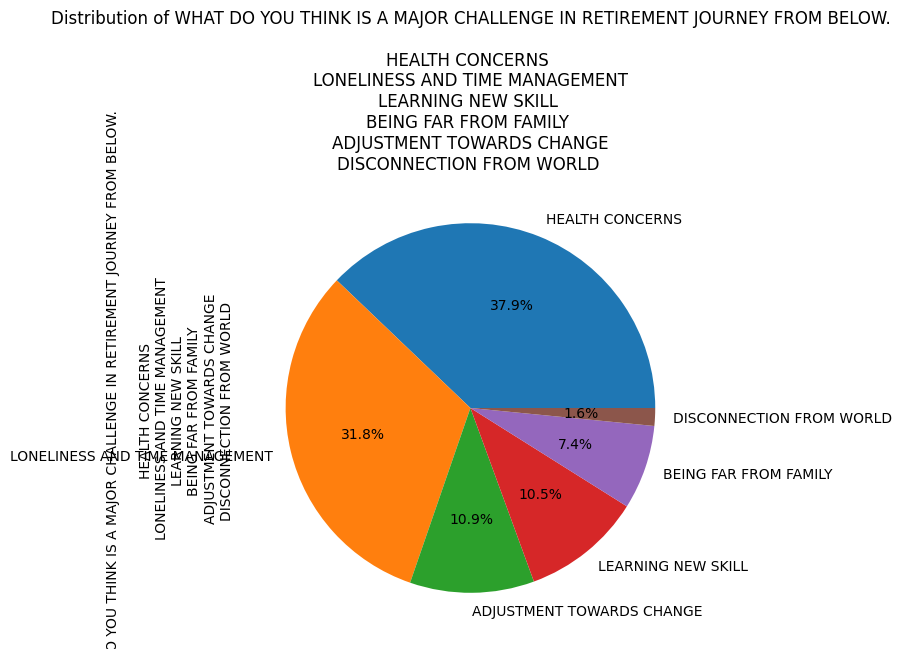

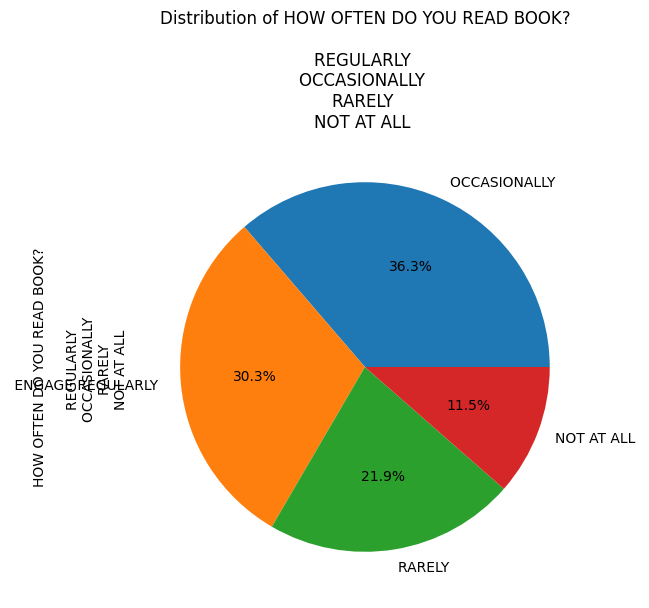

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


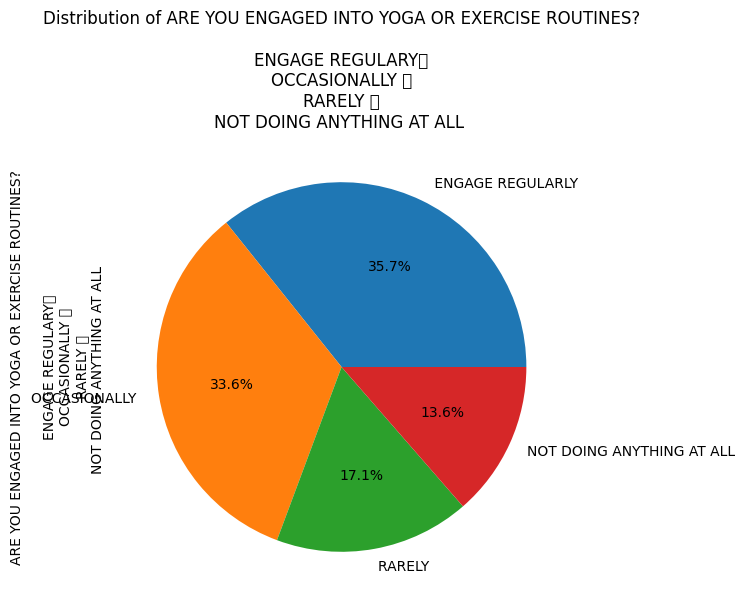

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


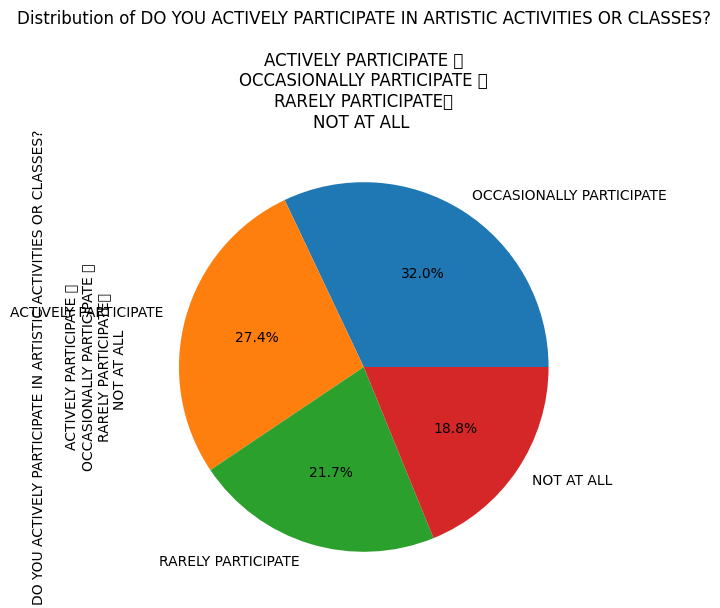

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


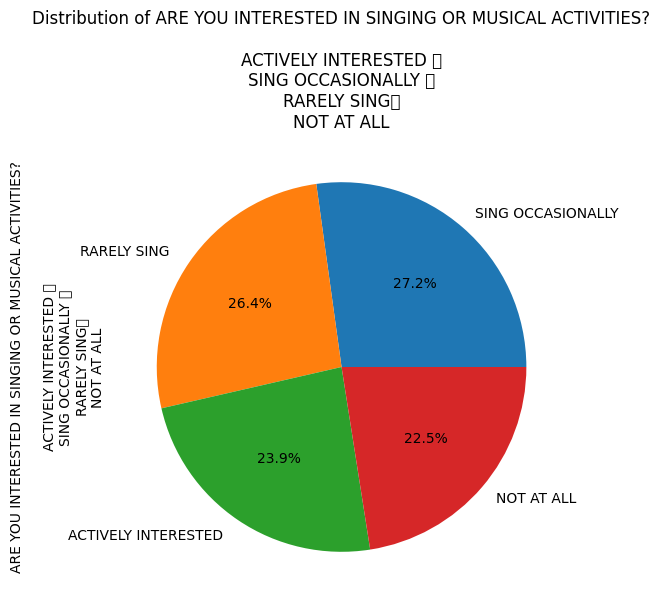

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


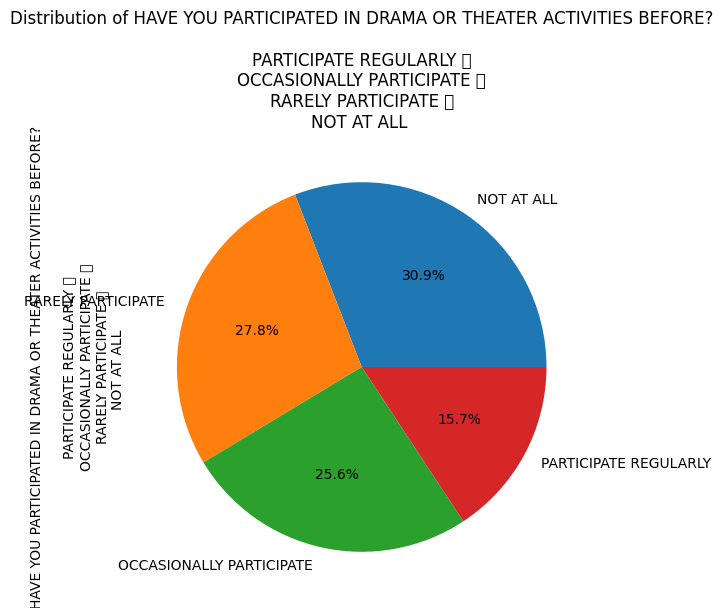

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


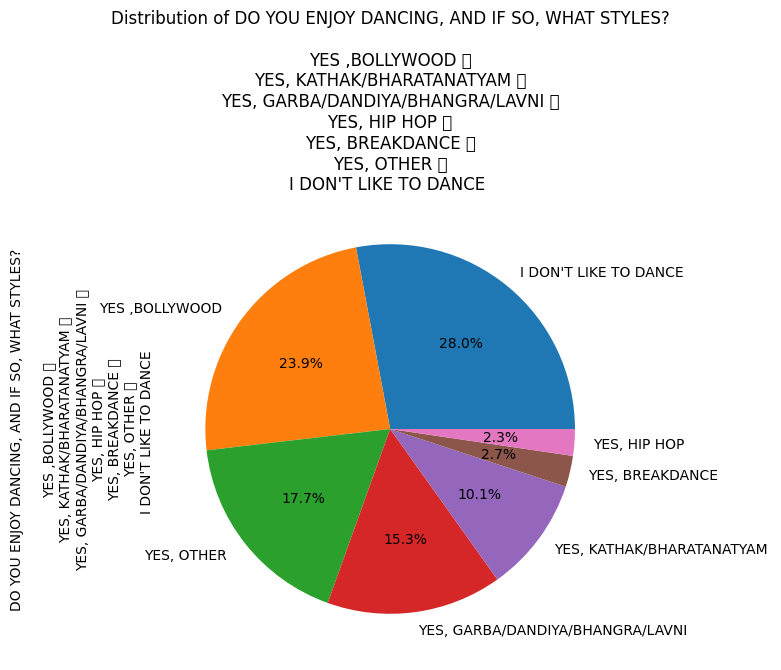

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


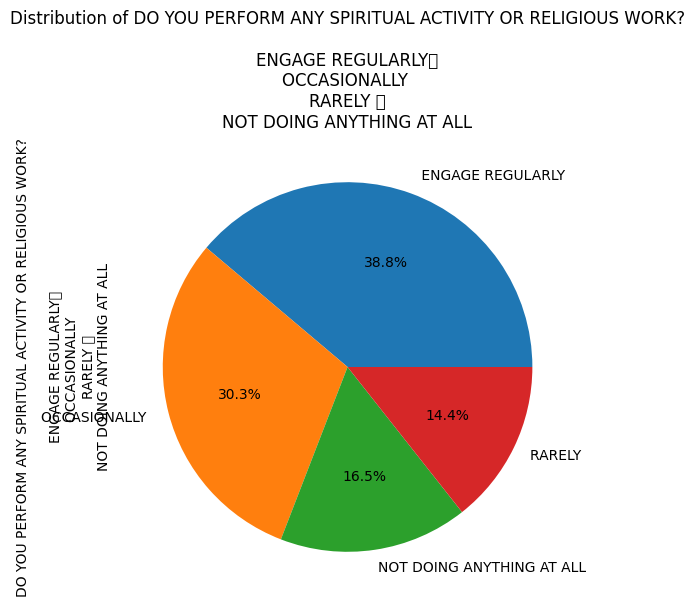

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


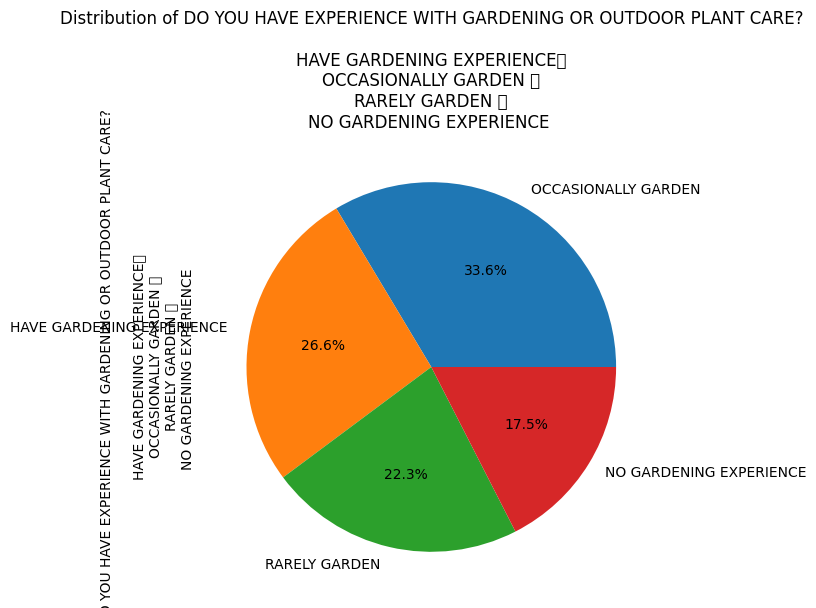

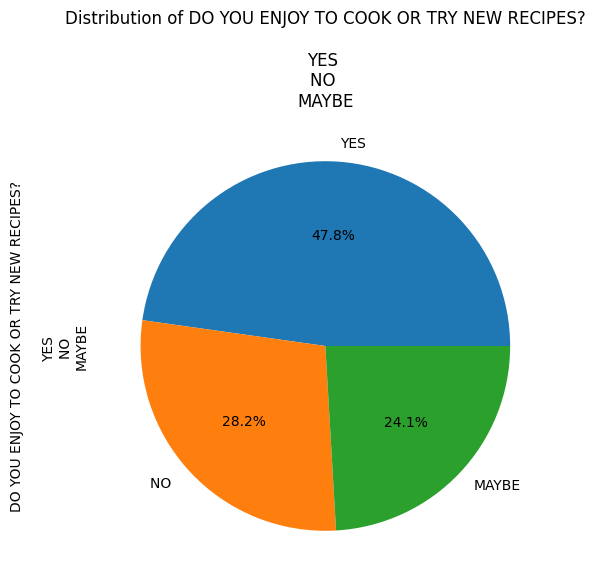

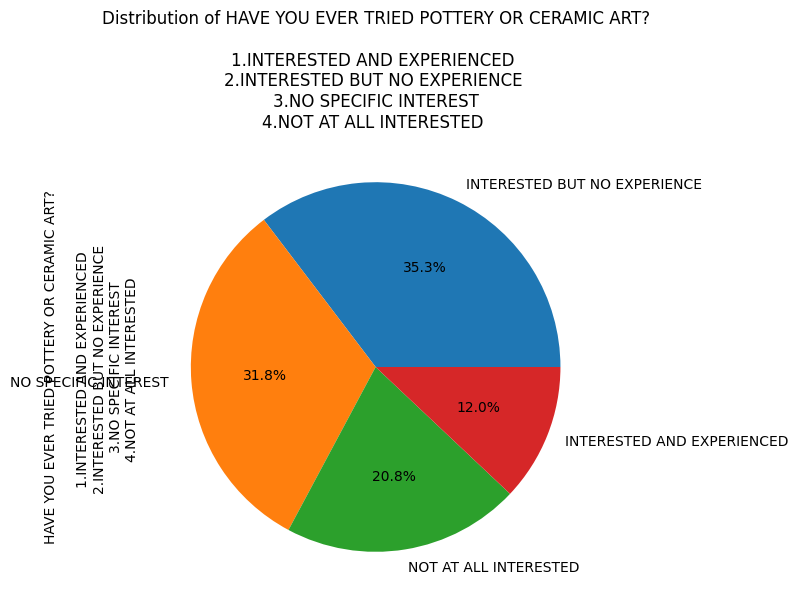

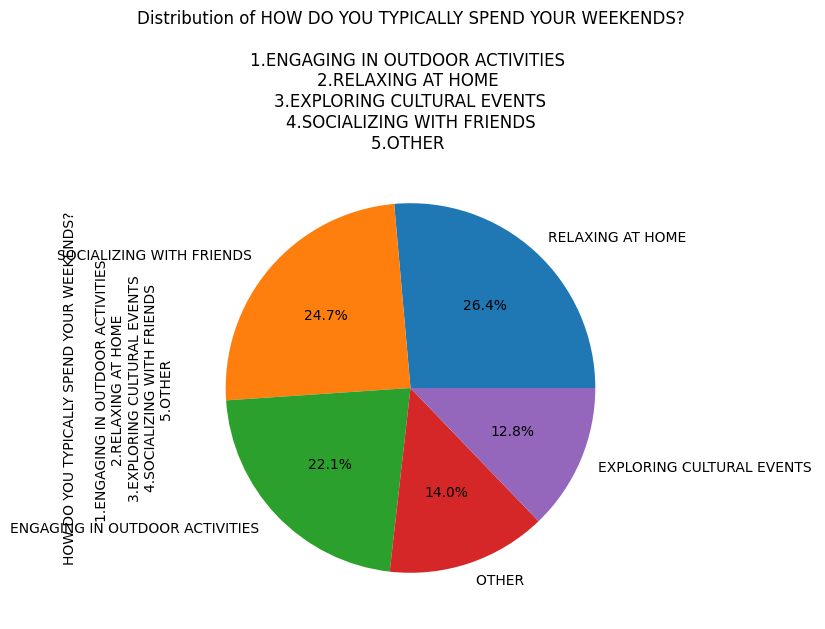

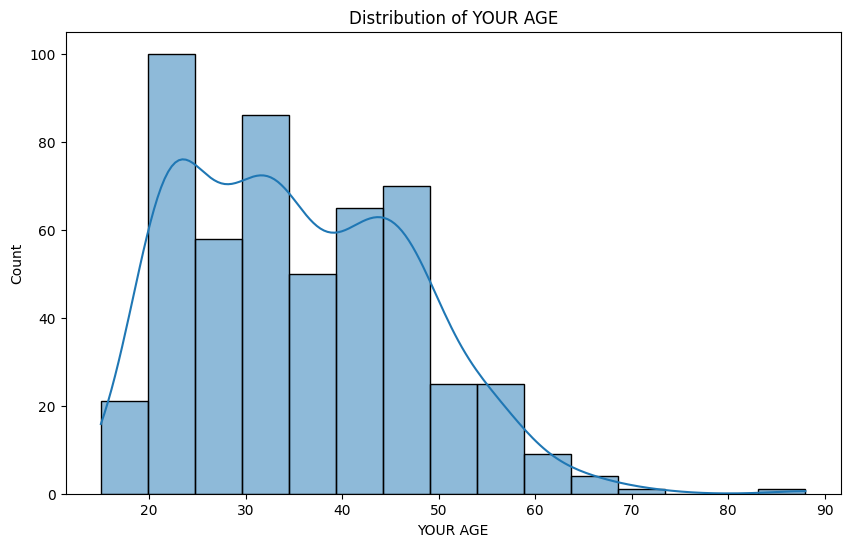

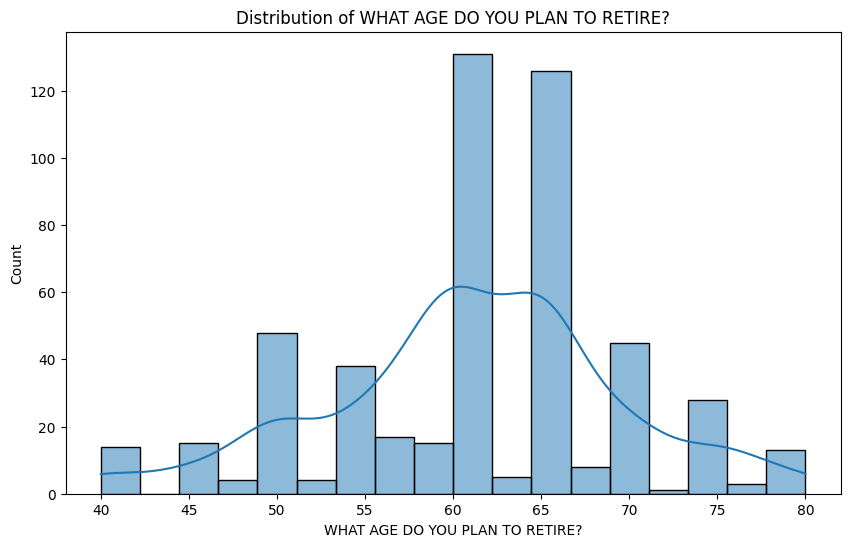

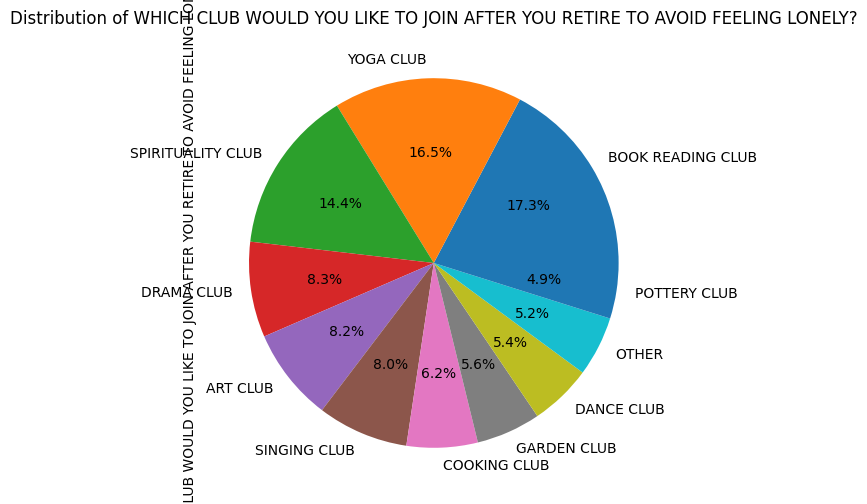

Enter value for YOUR GENDER

MALE 
FEMALE 
OTHER: FEMALE
Enter value for YOUR PROFESSION 

FARMER 
TEACHER 
STUDENT 
ENGINEER 
DOCTOR 
BUSINESSMAN
EMPLOYEE 
HOUSEWIFE 
OTHER: TEACHER
Enter value for WHICH AREA DO YOU BELONG TO?

RURAL 
URBAN : URBAN
Enter value for WHAT DO YOU PREFER MOST?

APPLICATION IN MOBILE 
SMARTWATCH APPLICATION : APPLICATION IN MOBILE
Enter value for WHAT DO YOU THINK IS A MAJOR CHALLENGE IN RETIREMENT JOURNEY FROM BELOW.

HEALTH CONCERNS 
LONELINESS AND TIME MANAGEMENT
LEARNING NEW SKILL 
BEING FAR FROM FAMILY 
ADJUSTMENT TOWARDS CHANGE
DISCONNECTION FROM WORLD : LONELINESS AND TIME MANAGEMENT
Enter value for HOW OFTEN DO YOU READ BOOK?

REGULARLY 
OCCASIONALLY 
RARELY 
NOT AT ALL : REGULARLY
Enter value for ARE YOU ENGAGED INTO YOGA OR EXERCISE ROUTINES?

ENGAGE REGULARY
OCCASIONALLY 
RARELY 
NOT DOING ANYTHING AT ALL : NOT DOING ANYTHING AT ALL
Enter value for DO YOU ACTIVELY PARTICIPATE IN ARTISTIC ACTIVITIES OR CLASSES?

ACTIVELY PARTICIPATE 
OCCASIONALLY 

In [ ]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


#Loading our data
df = pd.read_csv('/content/Untitled spreadsheet - Sheet1 (3).csv')

#Displaying first 5 lines of the cleaned data
print("First 5 lines of the cleaned data:")
print(df.head())

#Printing column names
print(df.columns)

#Displaying pie charts, histograms, or bar graphs for each column
for col in df.columns:
    plt.figure(figsize=(10, 6))
    if df[col].dtype == 'O':  # If column is categorical
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Distribution of {col}')
    else:  # If column is numerical
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.show()

# Data Preprocessing
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'O':  # If column is categorical
        df[col] = label_encoder.fit_transform(df[col])

# Model Training

X = df.drop('WHICH CLUB WOULD YOU LIKE TO JOIN AFTER YOU RETIRE TO AVOID FEELING LONELY?', axis=1)
y = df['WHICH CLUB WOULD YOU LIKE TO JOIN AFTER YOU RETIRE TO AVOID FEELING LONELY?']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# User Input for Prediction
new_entry = {}  # Replace this with user input
for col in df.columns[:-1]:  # Exclude the target variable 'Club'
    new_entry[col] = input(f"Enter value for {col}: ")

In [ ]:
# Convert user input to DataFrame
user_data = pd.DataFrame([new_entry])



In [ ]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)


                                              Feature  Importance
16                                           YOUR AGE    0.110308
17                    WHAT AGE DO YOU PLAN TO RETIRE?    0.089380
1   YOUR PROFESSION \n\nFARMER \r\nTEACHER \r\nSTU...    0.075416
15  HOW DO YOU TYPICALLY SPEND YOUR WEEKENDS?\n\n1...    0.062484
10  DO YOU ENJOY DANCING, AND IF SO, WHAT STYLES?\...    0.062262
4   WHAT DO YOU THINK IS A MAJOR CHALLENGE IN RETI...    0.058564
8   ARE YOU INTERESTED IN SINGING OR MUSICAL ACTIV...    0.056512
14  HAVE YOU EVER TRIED POTTERY OR CERAMIC ART?\n\...    0.056481
12  DO YOU HAVE EXPERIENCE WITH GARDENING OR OUTDO...    0.054374
5   HOW OFTEN DO YOU READ BOOK?\n\nREGULARLY \nOCC...    0.053696
11  DO YOU PERFORM ANY SPIRITUAL ACTIVITY OR RELIG...    0.053596
7   DO YOU ACTIVELY PARTICIPATE IN ARTISTIC ACTIVI...    0.053432
6   ARE YOU ENGAGED INTO YOGA OR EXERCISE ROUTINES...    0.051784
9   HAVE YOU PARTICIPATED IN DRAMA OR THEATER ACTI...    0.051375
13  DO YOU

In [ ]:
# Encoding categorical variables using the same label encoder used for training
for col in user_data.columns:
    if user_data[col].dtype == 'O':  # If column is categorical
        user_data[col] = user_data[col].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)

# Transforming on the user input using the encoder fitted on the training set
user_data_encoded = user_data.apply(lambda col: label_encoder.transform(col) if col.dtype == 'O' else col)

# Making Prediction
prediction = model.predict(user_data_encoded)

# Displaying Prediction
print(f"\nYOU MUST CONSIDER JOINING: {label_encoder.inverse_transform(prediction)[0]}")



YOU MUST CONSIDER JOINING: SINGING CLUB
